## Thanks to:
https://stackoverflow.com/questions/37003272/how-to-compute-jaccard-similarity-from-a-pandas-dataframe

In [2]:
import pandas as pd
from sklearn.metrics import jaccard_similarity_score, pairwise_distances
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy.cluster.hierarchy as shc
import scipy.spatial.distance as ssd #pdist
import PyQt5
from PyQt5 import QtGui
import ete3
from ete3 import Tree, TreeStyle
#from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
x = datetime.datetime.now()
print(x)

2019-05-09 18:46:00.189736


In [4]:
y = datetime.datetime.now()
print(y)

2019-05-09 18:46:00.504502


In [5]:
print("Done with pairwise in: %s" % (y - x))

Done with pairwise in: 0:00:00.314766


In [6]:
dataframe = pd.read_csv('data/test_new_ddtb.tsv', sep='\t', header=0)

In [7]:
#6-25213 vs 6-85169

print(dataframe.columns.tolist())

['Position', 'N', 'Samples', 'P1152', 'AL39835', '6-25213', '6-85169', '6-49128', 'P1150', 'T18-055', '14N1', 'T18-043', '2B1', '14N13', '6-37190', '1B3', 'AL2985503', 'T18-054', '6-48233', '76-15094', '6-37453']


In [8]:
dataframe.head()

,Position,N,Samples,P1152,AL39835,6-25213,6-85169,6-49128,P1150,T18-055,...,T18-043,2B1,14N13,6-37190,1B3,AL2985503,T18-054,6-48233,76-15094,6-37453
0,371.0,4.0,"14N1,2B1,14N13,1B3",0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,1849.0,1.0,T18-055,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1977.0,5.0,"14N1,2B1,14N13,1B3,AL2985503",0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
3,2532.0,8.0,"P1152,P1150,14N1,2B1,14N13,1B3,76-15094,6-37453",1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,6438.0,6.0,"6-25213,6-85169,6-49128,6-37190,6-48233,6-37453",0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [9]:
var = "%s\t%s" % (dataframe.shape)
print(var)

392	21


In [10]:
def compare_jaccard_columns(sample1, sample2, df):
    jaccard_similarity = jaccard_similarity_score(df[sample1], df[sample2])
    return jaccard_similarity

def compare_snp_columns(sample1, sample2, df):
    jaccard_similarity = jaccard_similarity_score(df[sample1], df[sample2]) #similarities between colums
    hamming_similarity = 1 - jaccard_similarity #disagreements between colums
    snp_distance = int(hamming_similarity * (len(df.index)+1))
    return snp_distance

def snp_distance_pairwise(dataframe, output_file):
    if os.path.exists(output_file):
        os.remove(output_file)
    with open(output_file, "a") as f:
        for sample1 in dataframe.iloc[:,3:].columns: #remove first 3 colums
            for sample2 in dataframe.iloc[:,3:].columns:
                snp_distance = compare_snp_columns(sample1, sample2, dataframe)
                if sample1 != sample2:
                    line_distance = "%s\t%s\t%s\n" % (sample1, sample2, snp_distance)
                    f.write(line_distance)

In [11]:
snp_distance_pairwise(dataframe, 'data/test_data_pairwise_no_same.csv')

In [14]:
jac = ssd.pdist(data_hamming.T, 'jaccard') #jaccard'

NameError: name 'data_hamming' is not defined

In [15]:
sample1='6-37190'
sample2='6-48233'
comparing2 = compare_jaccard_columns(sample1, sample2 , dataframe)
hamming2 = 1 - comparing2
print(comparing2)
print(hamming2)
print(int((hamming2 * (len(dataframe.index) +1))))
print(compare_snp_columns(sample1,sample2,dataframe))

0.9948979591836735
0.005102040816326481
2
2


In [16]:
#print("SNP distance between %s and %s are: %s" % (sample1, sample2, int((1 - comparing2) * len(dataframe.index + 1)
                                                                       
print("SNP distance between %s and %s are: %s" % (sample1, sample2, compare_snp_columns(sample1, sample2, dataframe)))

SNP distance between 6-37190 and 6-48233 are: 2


In [17]:
# Delete multiple columns from the dataframe
data_hamming = dataframe.set_index(dataframe['Position'].astype(int)).drop(['Position','N','Samples'], axis=1) #inplace=True


In [18]:
data_hamming.head()

,P1152,AL39835,6-25213,6-85169,6-49128,P1150,T18-055,14N1,T18-043,2B1,14N13,6-37190,1B3,AL2985503,T18-054,6-48233,76-15094,6-37453
Position,,,,,,,,,,,,,,,,,,
371,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1849,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1977,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2532,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
6438,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [19]:
hamming_distance = pairwise_distances(data_hamming.T, metric = "hamming") #dataframe.T means transposed


In [20]:
hamming_distance_df = pd.DataFrame(hamming_distance, index=data_hamming.columns, columns=data_hamming.columns) #Add index


snp_distance_df = pd.DataFrame(hamming_distance * len(data_hamming.index), index=data_hamming.columns, columns=data_hamming.columns) #Add index
snp_distance_df = snp_distance_df.astype(int)
#jac_sim = pd.DataFrame(jac_sim, index=df.columns, columns=df.columns)
# jac_sim = np.triu(jac_sim) to set the lower diagonal to zero
# jac_sim = np.tril(jac_sim) to set the upper diagonal to zero

In [21]:
snp_distance_df.astype(int)

,P1152,AL39835,6-25213,6-85169,6-49128,P1150,T18-055,14N1,T18-043,2B1,14N13,6-37190,1B3,AL2985503,T18-054,6-48233,76-15094,6-37453
P1152,0,100,107,107,109,0,144,94,127,94,94,109,94,96,105,112,103,100
AL39835,100,0,105,100,96,100,144,89,127,96,89,101,96,87,105,101,105,105
6-25213,107,105,0,7,14,107,146,101,127,103,101,3,103,105,105,6,24,7
6-85169,107,100,7,0,12,107,144,100,127,103,100,6,103,100,105,6,28,14
6-49128,109,96,14,12,0,109,144,103,127,105,103,14,105,103,105,14,31,19
P1150,0,100,107,107,109,0,144,94,127,94,94,109,94,96,105,112,103,100
T18-055,144,144,146,144,144,144,0,144,121,144,144,144,144,144,103,146,144,144
14N1,94,89,101,100,103,94,144,0,127,28,0,101,28,50,105,103,100,100
T18-043,127,127,127,127,127,127,121,127,0,127,127,127,127,127,33,127,127,127
2B1,94,96,103,103,105,94,144,28,127,0,28,105,0,58,105,107,100,100


In [22]:
hamming_distance_df

,P1152,AL39835,6-25213,6-85169,6-49128,P1150,T18-055,14N1,T18-043,2B1,14N13,6-37190,1B3,AL2985503,T18-054,6-48233,76-15094,6-37453
P1152,0.000000,0.255102,0.275510,0.275510,0.280612,0.000000,0.367347,0.239796,0.326531,0.239796,0.239796,0.280612,0.239796,0.244898,0.267857,0.285714,0.265306,0.255102
AL39835,0.255102,0.000000,0.270408,0.255102,0.244898,0.255102,0.367347,0.229592,0.326531,0.244898,0.229592,0.260204,0.244898,0.224490,0.267857,0.260204,0.270408,0.270408
6-25213,0.275510,0.270408,0.000000,0.020408,0.035714,0.275510,0.372449,0.260204,0.326531,0.265306,0.260204,0.010204,0.265306,0.270408,0.267857,0.015306,0.061224,0.020408
6-85169,0.275510,0.255102,0.020408,0.000000,0.030612,0.275510,0.367347,0.255102,0.326531,0.265306,0.255102,0.015306,0.265306,0.255102,0.267857,0.015306,0.071429,0.035714
6-49128,0.280612,0.244898,0.035714,0.030612,0.000000,0.280612,0.367347,0.265306,0.326531,0.270408,0.265306,0.035714,0.270408,0.265306,0.267857,0.035714,0.081633,0.051020
P1150,0.000000,0.255102,0.275510,0.275510,0.280612,0.000000,0.367347,0.239796,0.326531,0.239796,0.239796,0.280612,0.239796,0.244898,0.267857,0.285714,0.265306,0.255102
T18-055,0.367347,0.367347,0.372449,0.367347,0.367347,0.367347,0.000000,0.367347,0.311224,0.367347,0.367347,0.367347,0.367347,0.367347,0.262755,0.372449,0.367347,0.367347
14N1,0.239796,0.229592,0.260204,0.255102,0.265306,0.239796,0.367347,0.000000,0.326531,0.071429,0.000000,0.260204,0.071429,0.127551,0.267857,0.265306,0.255102,0.255102
T18-043,0.326531,0.326531,0.326531,0.326531,0.326531,0.326531,0.311224,0.326531,0.000000,0.326531,0.326531,0.326531,0.326531,0.326531,0.084184,0.326531,0.326531,0.326531
2B1,0.239796,0.244898,0.265306,0.265306,0.270408,0.239796,0.367347,0.071429,0.326531,0.000000,0.071429,0.270408,0.000000,0.147959,0.267857,0.275510,0.255102,0.255102


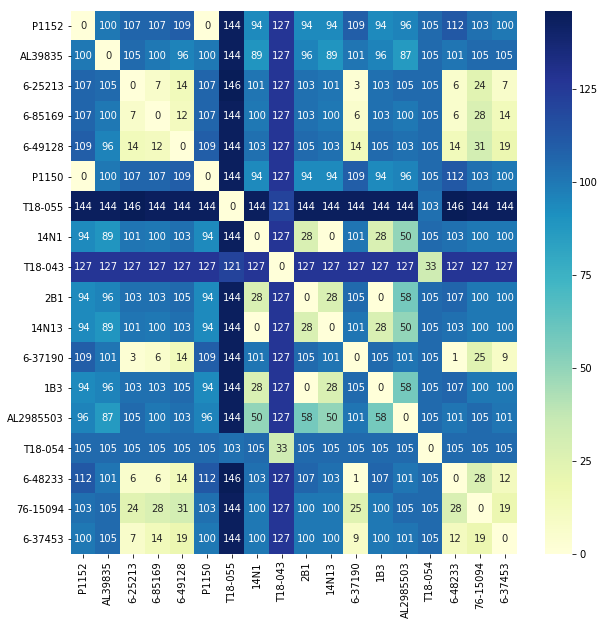

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(snp_distance_df, annot=True, fmt='g', cmap="YlGnBu") #linewidths=.5, fmt="d"

/home/laura/env36/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


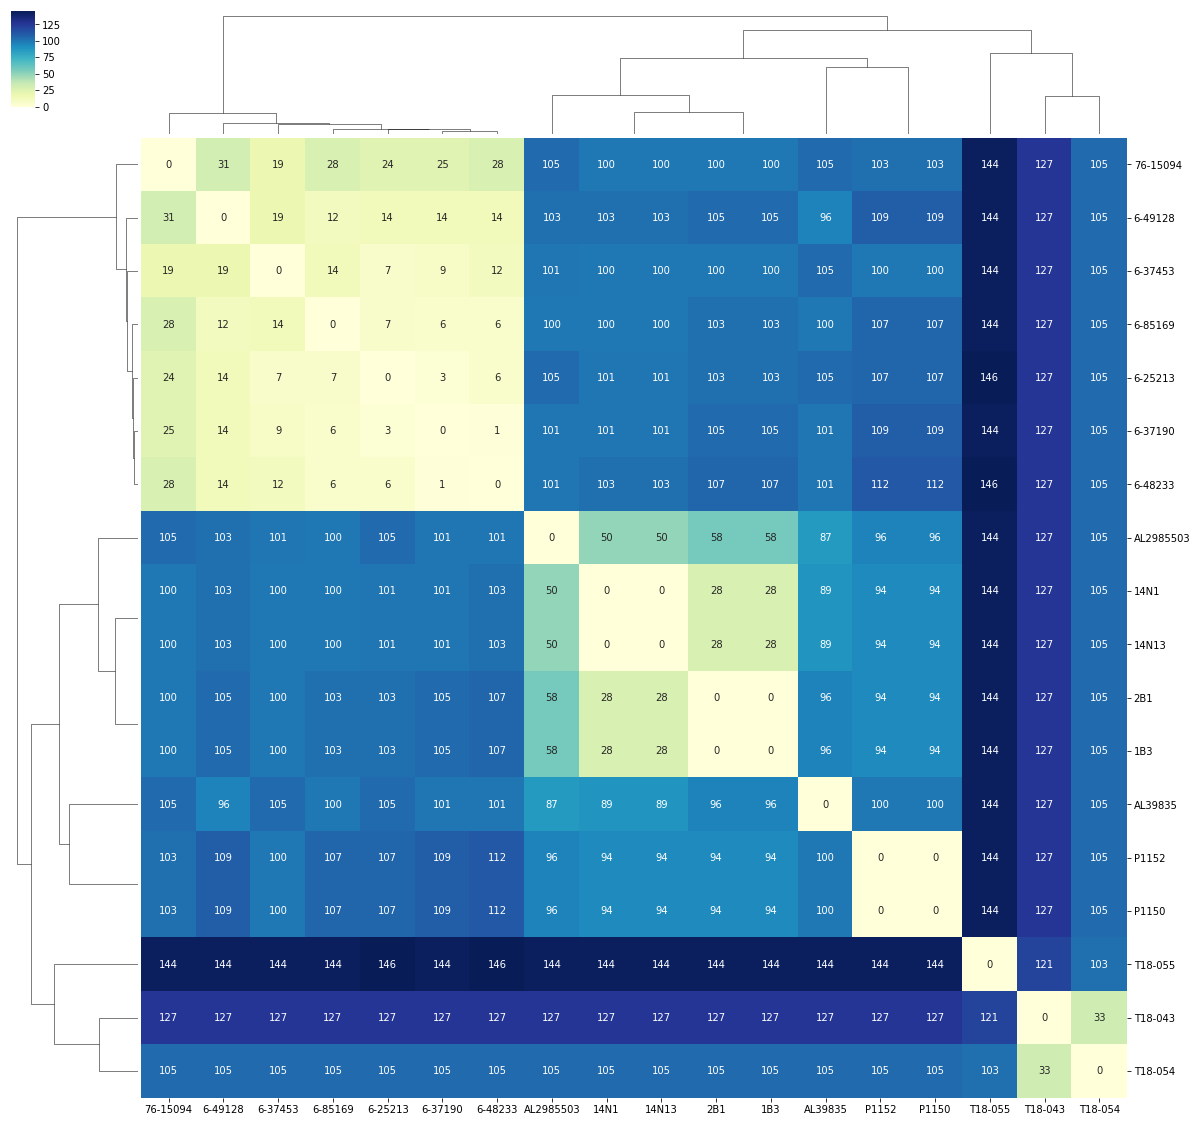

In [24]:
sns.clustermap(snp_distance_df, annot=True, fmt='g', cmap="YlGnBu", figsize=(20, 20)) #linewidths=.5, fmt="d"

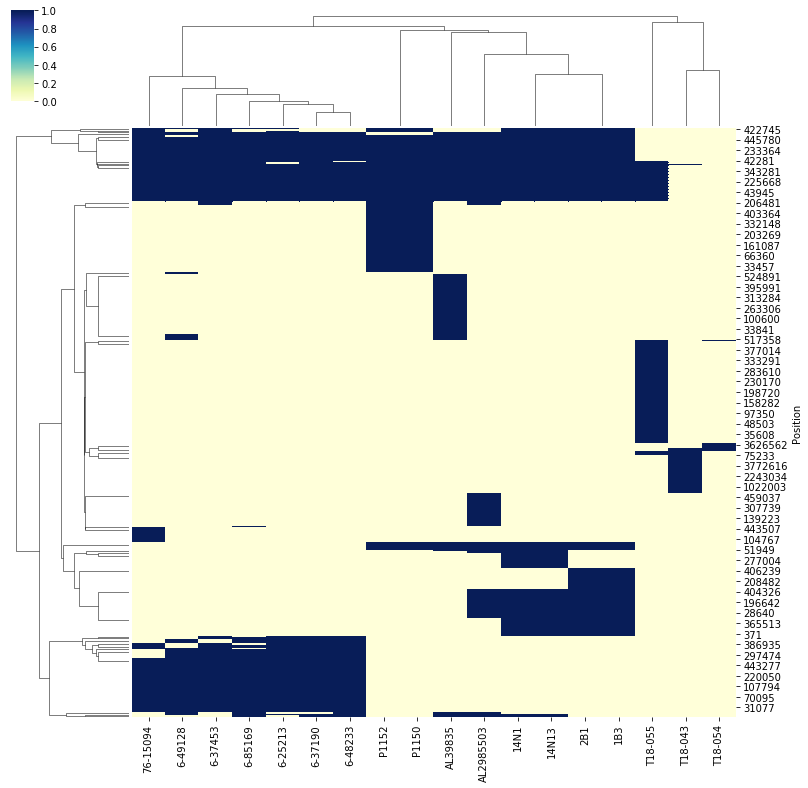

In [25]:
sns.clustermap(data_hamming,row_cluster=True, annot=False, cmap="YlGnBu", figsize=(13, 13)) #linewidths=.5, method="single"

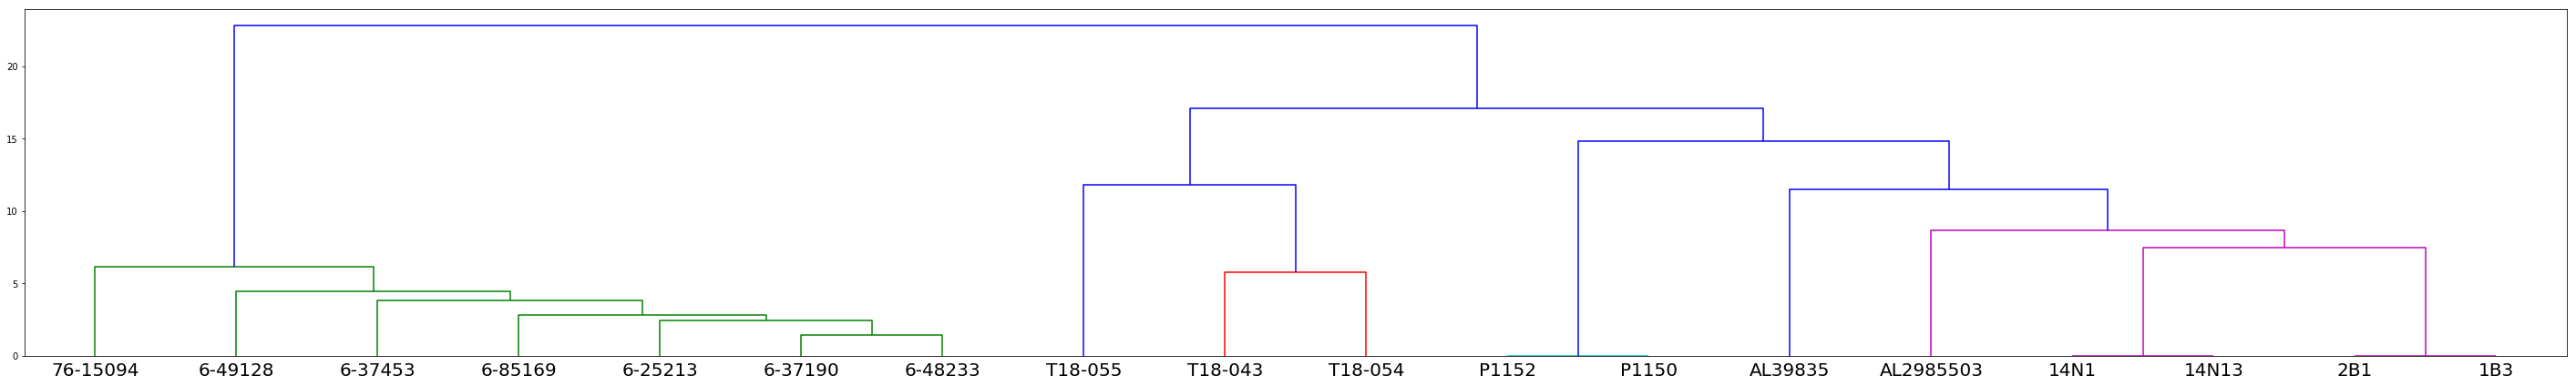

In [26]:
labelList = data_hamming.columns.tolist()
linked = shc.linkage(data_hamming.T, method='ward') #method='single'
plt.figure(figsize=(50, 7))
plt.ylim(-5,50)

shc.dendrogram(linked, labels=labelList, distance_sort='descending', show_leaf_counts=True, color_threshold=10, leaf_font_size=20)

plt.show()

In [27]:
print(labelList)

['P1152', 'AL39835', '6-25213', '6-85169', '6-49128', 'P1150', 'T18-055', '14N1', 'T18-043', '2B1', '14N13', '6-37190', '1B3', 'AL2985503', 'T18-054', '6-48233', '76-15094', '6-37453']


In [154]:
linked_matrix = shc.linkage(data_hamming.T, method='ward')
tree_linked = shc.to_tree(linked_matrix)
root_node, node_list = shc.to_tree(linked_matrix, rd=True)
leaf_name = data_hamming.columns.tolist()
print(len(leaf_name))
print(tree_linked)
#print(dir(root_node))
print(root_node.id)
print(root_node.dist)

print("######################")

for node in node_list:
    if node.is_leaf():
        node.id = leaf_name[node.id]
    else:
        node.id = node.id
    print(node.id, node.dist, node.get_left(), node.right)

"""
#ete3 section
root = Tree()
root.dist = 0
root.name = 'root'
item2node = {tree_linked : root}
#to_visit  = T

to_visit = tree_linked

while to_visit:
    node = to_visit.pop()
    #print(node.get_id())
    #print(node.is_leaf())
    cl_dist = node.dist /2.0
    #print(cl_dist)
    for ch_node in [node.left, node.right]:
        if ch_node:
            ch = Tree()
            ch.dist = cl_dist
            ch.name = str(ch_node.id)
            item2node[node].add_child(ch)
            item2node[ch_node] = ch
            to_visit.append(ch_node)

# This is your ETE tree structure
tree = root
"""

while to_visit:
    node = to_visit.pop()
    print("NODE: ", node.get_id(), node.get_left(), node.get_right())
    
    cl_dist = node.dist / 2.0

    for ch_node in [node.get_left(), node.get_right()]:
        if ch_node:
            ch_node_id         = ch_node.get_id()
            ch_node_name       = str(ch_node_id)
            ch                 = Tree()
            ch.dist            = cl_dist
            ch.name            = ch_node_name

            #if node.is_leaf():
            #    ch.name    = nodeNames[ ch_node_id ]

            item2node[ch_node_id] = ch
            item2node[ch_node_id].add_child(ch)
            to_visit.append(ch_node)
            
# This is your ETE tree structure
#tree = root
#"""

18
34
22.779354466248375
######################
P1152 0 None None
AL39835 0 None None
6-25213 0 None None
6-85169 0 None None
6-49128 0 None None
P1150 0 None None
T18-055 0 None None
14N1 0 None None
T18-043 0 None None
2B1 0 None None
14N13 0 None None
6-37190 0 None None
1B3 0 None None
AL2985503 0 None None
T18-054 0 None None
6-48233 0 None None
76-15094 0 None None
6-37453 0 None None
18 0.0 <scipy.cluster.hierarchy.ClusterNode object at 0x7fbd47d0cac8> <scipy.cluster.hierarchy.ClusterNode object at 0x7fbd48236cc0>
19 0.0 <scipy.cluster.hierarchy.ClusterNode object at 0x7fbd48236d30> <scipy.cluster.hierarchy.ClusterNode object at 0x7fbd482367b8>
20 0.0 <scipy.cluster.hierarchy.ClusterNode object at 0x7fbd48236da0> <scipy.cluster.hierarchy.ClusterNode object at 0x7fbd48236ba8>
21 1.4142135623730951 <scipy.cluster.hierarchy.ClusterNode object at 0x7fbd48236f60> <scipy.cluster.hierarchy.ClusterNode object at 0x7fbd48236ef0>
22 2.449489742783178 <scipy.cluster.hierarchy.ClusterNode o

In [194]:
linked_matrix = shc.linkage(data_hamming.T, method='ward')
tree_linked = shc.to_tree(linked_matrix)
root_node, node_list = shc.to_tree(linked_matrix, rd=True)

#ete3 section
root      = Tree()
root.dist = 0
root.name = 'root'
item2node = {root_node.get_id(): root}
to_visit  = node_list

while to_visit:
    node = to_visit.pop()
    #print("NODE", node.id)
    cl_dist = node.dist / 2.0

    for ch_node in [node.get_left(), node.get_right()]:
        #print(ch_node.id)
        if ch_node:
            #print("left: ", str(ch_node.id))
            ch_node_id         = str(ch_node.get_id())
            ch                 = Tree()
            ch.dist            = cl_dist
            ch.name            = ch_node_id
            #print(ch, cl_dist)
            #if nodeNames:
            #    if ch_node_id < len(nodeNames):
            #        ch.name    = nodeNames[ ch_node_id ]

            item2node[ch_node_id] = ch
            item2node[ch_node_id].add_child(ch)
            to_visit.append(ch_node)
            #print(ch)
# This is your ETE tree structure
#tree = root

In [215]:
t = Tree()
# We create a random tree topology
t.populate(15)
#print( t)
#print( t.children)
#print( t.get_children())
#print( t.up)
#print( t.name)
#print( t.dist)
#print( t.is_leaf())
#print( t.get_tree_root())
#print( t.children[0].get_tree_root())
#print( t.children[0].children[0].get_tree_root())
# You can also iterate over tree leaves using a simple syntax
#for leaf in t:
#  print( leaf.name)

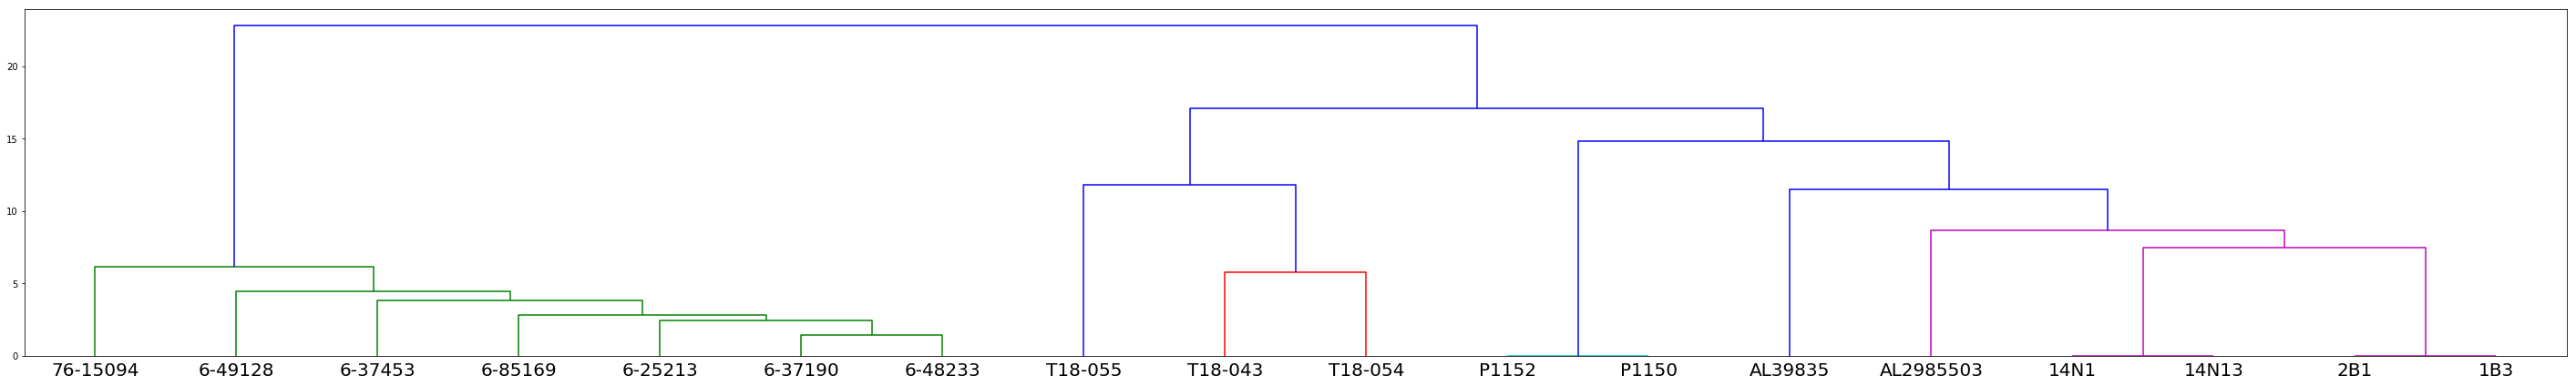

In [239]:
labelList = data_hamming.columns.tolist()
linked = shc.linkage(data_hamming.T, method='ward') #method='single'
plt.figure(figsize=(50, 7))
plt.ylim(-5,50)

shc.dendrogram(linked,labels=labelList, distance_sort='descending', show_leaf_counts=True, color_threshold=10, leaf_font_size=20)

plt.show()

## https://github.com/biocore/scikit-bio/issues/1579

In [29]:
# Convert dendrogram to Newick
def linkage_to_newick(Z, labels):
    """
    Input :  Z = linkage matrix, labels = leaf labels
    Output:  Newick formatted tree string
    """
    tree = shc.to_tree(Z, False)
    def buildNewick(node, newick, parentdist, leaf_names):
        if node.is_leaf():
            #print("%s:%f%s" % (leaf_names[node.id], parentdist - node.dist, newick))
            return "%s:%f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
        else:
            if len(newick) > 0:
                newick = f"):{(parentdist - node.dist)/2}{newick}"
            else:
                newick = ");"
            newick = buildNewick(node.get_left(), newick, node.dist, leaf_names)
            newick = buildNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
            newick = "(%s" % (newick)
            #print(newick)
            return newick
            
    return buildNewick(tree, "", tree.dist, labels)

In [30]:
linked_matrix = shc.linkage(data_hamming.T, method='ward')
tree_linked = shc.to_tree(linked_matrix)

print(tree_linked.is_leaf())

False


In [31]:
linked_matrix = shc.linkage(data_hamming.T, method='ward')
tree_linked = shc.to_tree(linked_matrix)
root_node, node_list = shc.to_tree(linked_matrix, rd=True)

labelList = data_hamming.columns.tolist()

tree_nwk = linkage_to_newick(linked_matrix, labelList)



76-15094:6.164414):8.3074702316397);
6-49128:4.427189):0.8686126393666225,76-15094:6.164414):8.3074702316397);
6-37453:3.794733):0.3162277660168378,6-49128:4.427189):0.8686126393666225,76-15094:6.164414):8.3074702316397);
6-85169:2.828427):0.4831530337279326,6-37453:3.794733):0.3162277660168378,6-49128:4.427189):0.8686126393666225,76-15094:6.164414):8.3074702316397);
6-25213:2.449490):0.1894686909815062,6-85169:2.828427):0.4831530337279326,6-37453:3.794733):0.3162277660168378,6-49128:4.427189):0.8686126393666225,76-15094:6.164414):8.3074702316397);
6-37190:1.414214):0.5176380902050414,6-25213:2.449490):0.1894686909815062,6-85169:2.828427):0.4831530337279326,6-37453:3.794733):0.3162277660168378,6-49128:4.427189):0.8686126393666225,76-15094:6.164414):8.3074702316397);
6-48233:1.414214,6-37190:1.414214):0.5176380902050414,6-25213:2.449490):0.1894686909815062,6-85169:2.828427):0.4831530337279326,6-37453:3.794733):0.3162277660168378,6-49128:4.427189):0.8686126393666225,76-15094:6.164414):8.

In [230]:
linked_matrix = shc.linkage(data_hamming.T, method='ward')
tree_linked = shc.to_tree(linked_matrix)
root_node, node_list = shc.to_tree(linked_matrix, rd=True)

labelList = data_hamming.columns.tolist()
for node in node_list:
    if node.is_leaf():
        #print(name_leaf)
        node.id = labelList[node.id]
        

for node in node_list:
    if node.get_left() and node.get_right():
        print(node.count, node.right.id, node.id, node.left.id, node.dist)
    else:
        print(node.count, node.id, node.dist)

1 P1152 0
1 AL39835 0
1 6-25213 0
1 6-85169 0
1 6-49128 0
1 P1150 0
1 T18-055 0
1 14N1 0
1 T18-043 0
1 2B1 0
1 14N13 0
1 6-37190 0
1 1B3 0
1 AL2985503 0
1 T18-054 0
1 6-48233 0
1 76-15094 0
1 6-37453 0
2 P1150 18 P1152 0.0
2 14N13 19 14N1 0.0
2 1B3 20 2B1 0.0
2 6-48233 21 6-37190 1.4142135623730951
3 21 22 6-25213 2.449489742783178
4 22 23 6-85169 2.8284271247461903
5 23 24 6-37453 3.7947331922020555
6 24 25 6-49128 4.427188724235731
2 T18-054 26 T18-043 5.744562646538029
7 25 27 76-15094 6.164414002968976
4 20 28 19 7.4833147735478835
5 28 29 AL2985503 8.67179335547152
6 29 30 AL39835 11.465891446663303
3 26 31 T18-055 11.789826122551595
8 30 32 18 14.84362938547488
11 32 33 31 17.074702180285737
18 33 34 27 22.779354466248375


In [243]:
linked_matrix = shc.linkage(data_hamming.T, method='ward')
tree_linked = shc.to_tree(linked_matrix)
root_node, node_list = shc.to_tree(linked_matrix, rd=True)

labelList = data_hamming.columns.tolist()
for node in node_list:
    if node.is_leaf():
        #print(name_leaf)
        node.id = labelList[node.id]
        
newick = ""
for node in node_list:
    if node.is_leaf():
            print("%s:%f%s" % (node.id, tree_linked.dist - node.dist, newick))
            #return "%s:%f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = f"):{(tree_linked.dist - node.dist)/2}{newick}"
        else:
            newick = ");"
        newick = buildNewick(node.get_left(), newick, node.dist, leaf_names)
        newick = buildNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
        newick = "(%s" % (newick)
        print(newick)

P1152:22.779354
AL39835:22.779354
6-25213:22.779354
6-85169:22.779354
6-49128:22.779354
P1150:22.779354
T18-055:22.779354
14N1:22.779354
T18-043:22.779354
2B1:22.779354
14N13:22.779354
6-37190:22.779354
1B3:22.779354
AL2985503:22.779354
T18-054:22.779354
6-48233:22.779354
76-15094:22.779354
6-37453:22.779354


NameError: name 'buildNewick' is not defined

In [225]:
print(tree_nwk)

(((((((1B3:0.000000,2B1:0.000000):7.483315,(14N13:0.000000,14N1:0.000000):7.483315):1.188479,AL2985503:8.671793):2.794098,AL39835:11.465891):3.377738,(P1150:0.000000,P1152:0.000000):14.843629):2.231073,((T18-054:5.744563,T18-043:5.744563):6.045263,T18-055:11.789826):5.284876):5.704652,((((((6-48233:1.414214,6-37190:1.414214):1.035276,6-25213:2.449490):0.378937,6-85169:2.828427):0.966306,6-37453:3.794733):0.632456,6-49128:4.427189):1.737225,76-15094:6.164414):16.614940);


In [234]:
#df_dism = pd.DataFrame({'sepal_length': {'sepal_length': 0.0, 'sepal_width': 0.8906307500493507, 'petal_length': 0.12824584269512807, 'petal_width': 0.1820463666308365}, 'sepal_width': {'sepal_length': 0.8906307500493507, 'sepal_width': 0.0, 'petal_length': 0.5794839035988452, 'petal_width': 0.6434559103861945}, 'petal_length': {'sepal_length': 0.12824584269512807, 'sepal_width': 0.5794839035988452, 'petal_length': 0.0, 'petal_width': 0.03724290294903332}, 'petal_width': {'sepal_length': 0.1820463666308365, 'sepal_width': 0.6434559103861945, 'petal_length': 0.03724290294903332, 'petal_width': 0.0}})
#Z = dism_to_linkage(df_dism)
#labels = df_dism.index

def dism_to_linkage(DF_dism, method="ward"):
    """
    Input: A (m x m) dissimalrity Pandas DataFrame object where the diagonal is 0
    Output: Hierarchical clustering encoded as a linkage matrix

    Further reading:
    http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html
    https://pypi.python.org/pypi/fastcluster
    """
    #Linkage Matrix
    Ar_dist = distance.squareform(DF_dism.as_matrix())
    return linkage(Ar_dist,method=method)

def from_linkage_matrix(linkage_matrix, id_list):
    """Return tree from SciPy linkage matrix.

    Parameters
    ----------
    linkage_matrix : ndarray
        A SciPy linkage matrix as returned by
        `scipy.cluster.hierarchy.linkage`
    id_list : list
        The indices of the `id_list` will be used in the linkage_matrix

    Returns
    -------
    TreeNode
        An unrooted bifurcated tree

    See Also
    --------
    scipy.cluster.hierarchy.linkage

    """
    cls=skbio.TreeNode
    tip_width = len(id_list)
    cluster_count = len(linkage_matrix)
    lookup_len = cluster_count + tip_width
    node_lookup = np.empty(lookup_len, dtype=cls)

    for i, name in enumerate(id_list):
        node_lookup[i] = cls(name=name)

    for i in range(tip_width, lookup_len):
        node_lookup[i] = cls()

    newest_cluster_index = cluster_count + 1
    for link in linkage_matrix:
        child_a = node_lookup[int(link[0])]
        child_b = node_lookup[int(link[1])]

        path_length = link[2] / 2
        child_a.length = path_length - child_a._balanced_distance_to_tip()
        child_b.length = path_length - child_b._balanced_distance_to_tip()

        new_cluster = node_lookup[newest_cluster_index]
        new_cluster.append(child_a)
        new_cluster.append(child_b)

        newest_cluster_index += 1

    return node_lookup[-1]

def linkage_to_newick(Z, labels):
    """
    Input :  Z = linkage matrix, labels = leaf labels
    Output:  Newick formatted tree string
    """
    tree = to_tree(Z, False)
    def buildNewick(node, newick, parentdist, leaf_names):
        if node.is_leaf():
            return f"{leaf_names[node.id]}:{(parentdist - node.dist)/2}{newick}"
        else:
            if len(newick) > 0:
                newick = f"):{(parentdist - node.dist)/2}{newick}"
            else:
                newick = ");"
            newick = buildNewick(node.get_left(), newick, node.dist, leaf_names)
            newick = buildNewick(node.get_right(), f",{newick}", node.dist, leaf_names)
            newick = f"({newick}" 
            return newick
    return buildNewick(tree, "", tree.dist, labels)

linked_matrix = shc.linkage(data_hamming.T, method='ward')
tree_linked = shc.to_tree(linked_matrix)

labelList = data_hamming.columns.tolist()




NameError: name 'skbio' is not defined

In [248]:
# Newick to ete3
# ==============
# skbio implementation 
#t_skbio = str(from_linkage_matrix(linked_matrix,labelList)).strip()
t_skbio = tree_nwk
print(tree_nwk)
# ('sepal_width':0.436759172706,('sepal_length':0.0902721430472,('petal_length':0.0186214514745,'petal_width':0.0186214514745):0.0716506915727):0.346487029659);

# %timeit str(from_linkage_matrix(Z,labels)).strip()
# 156 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

tree_skbio = ete3.Tree(t_skbio)
print(tree_skbio)
#    /-'sepal_width'
# --|
#   |   /-'sepal_length'
#    \-|
#      |   /-'petal_length'
#       \-|
#          \-'petal_width'


# custom implementation
t_custom = tree_nwk
print(t_custom)
# (((petal_width:0.01862145147451666,petal_length:0.01862145147451666):0.07165069157271295,sepal_length:0.09027214304722961):0.34648702965894207,sepal_width:0.4367591727061717);
# %timeit linkage_to_newick(Z,labels)
# 84.7 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
tree_custom = ete3.Tree(t_custom)
print(tree_custom)
#          /-petal_width
#       /-|
#    /-|   \-petal_length
#   |  |
# --|   \-sepal_length
#   |
#    \-sepal_width

# Compare trees
tree_custom.compare(tree_skbio)
# {'rf': 0.0,
#  'max_rf': -2.0,
#  'ref_edges_in_source': 'NA',
#  'source_edges_in_ref': 'NA',
#  'effective_tree_size': 0,
#  'norm_rf': -0.0,
#  'treeko_dist': 'NA',
#  'source_subtrees': 1,
#  'common_edges': set(),
#  'source_edges': set(),
#  'ref_edges': set()}

(((((((1B3:0.000000,2B1:0.000000):3.7416573867739418,(14N13:0.000000,14N1:0.000000):3.7416573867739418):0.5942392909618182,AL2985503:8.671793):1.3970490455958915,AL39835:11.465891):1.6888689694057888,(P1150:0.000000,P1152:0.000000):7.42181469273744):1.1155363974054282,((T18-054:5.744563,T18-043:5.744563):3.0226317380067833,T18-055:11.789826):2.642438028867071):2.852326142981319,((((((6-48233:1.414214,6-37190:1.414214):0.5176380902050414,6-25213:2.449490):0.1894686909815062,6-85169:2.828427):0.4831530337279326,6-37453:3.794733):0.3162277660168378,6-49128:4.427189):0.8686126393666225,76-15094:6.164414):8.3074702316397);

                     /-1B3
                  /-|
                 |   \-2B1
               /-|
              |  |   /-14N13
            /-|   \-|
           |  |      \-14N1
         /-|  |
        |  |   \-AL2985503
        |  |
      /-|   \-AL39835
     |  |
     |  |   /-P1150
     |   \-|
   /-|      \-P1152
  |  |
  |  |      /-T18-054
  |  |   /-|
  |   \-|   \-T1

{'rf': 0.0,
 'max_rf': 32.0,
 'ref_edges_in_source': 1.0,
 'source_edges_in_ref': 1.0,
 'effective_tree_size': 18,
 'norm_rf': 0.0,
 'treeko_dist': 'NA',
 'source_subtrees': 1,
 'common_edges': {('14N1', '14N13'),
  ('14N1', '14N13', '1B3', '2B1'),
  ('14N1',
   '14N13',
   '1B3',
   '2B1',
   '6-25213',
   '6-37190',
   '6-37453',
   '6-48233',
   '6-49128',
   '6-85169',
   '76-15094',
   'AL2985503',
   'AL39835',
   'P1150',
   'P1152',
   'T18-043',
   'T18-054',
   'T18-055'),
  ('14N1', '14N13', '1B3', '2B1', 'AL2985503'),
  ('14N1', '14N13', '1B3', '2B1', 'AL2985503', 'AL39835'),
  ('14N1', '14N13', '1B3', '2B1', 'AL2985503', 'AL39835', 'P1150', 'P1152'),
  ('14N1',
   '14N13',
   '1B3',
   '2B1',
   'AL2985503',
   'AL39835',
   'P1150',
   'P1152',
   'T18-043',
   'T18-054',
   'T18-055'),
  ('1B3', '2B1'),
  ('6-25213', '6-37190', '6-37453', '6-48233', '6-49128', '6-85169'),
  ('6-25213',
   '6-37190',
   '6-37453',
   '6-48233',
   '6-49128',
   '6-85169',
   '76-15094'),


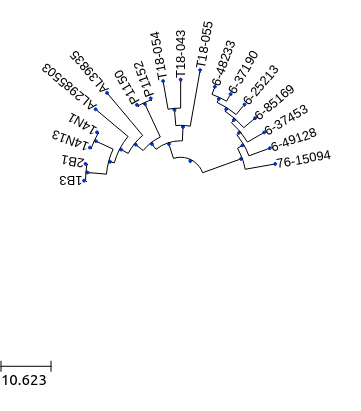

In [33]:
tree_custom = ete3.Tree(tree_nwk)
ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
tree_custom.render("%%inline",tree_style=ts)